<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/nomm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
#from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings
import torch
import pandas as pd
from pathlib import Path
import os
# start: 10:34

Klassid:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


Cloning the repository

In [2]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
all_data_bw			       msf_data
all_data_color			       msf_project1.ipynb
colab				       msf_project1_mixed.ipynb
convert_images.ipynb		       random_selection_test
convert_to_bw.ipynb		       random_selection_train
data_amounts			       web_data_links
ludvig_local_msf_project1_mixed.ipynb


In [3]:
#! git pull

In [2]:
nimede_vastavus = pd.DataFrame({"web_name": np.sort(listdir("all_data_color/")),
                                "game_name": np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")]))})

In [3]:
! mkdir random_selection_train
! mkdir random_selection_test


In [6]:
# creating temporary folder for selected files
from shutil import copyfile
import random
import shutil

selection_size_web = 250
selection_size_web_test = int(0.2*selection_size_web)

def abifun(x):
    return x[:len(nimede_vastavus.game_name[i])] == nimede_vastavus.game_name[i]
 
for i in range(nimede_vastavus.shape[0]):
  web_files = listdir("all_data_color/" + nimede_vastavus.web_name[i])
  game_files_clear = listdir("msf_data/image_data_clear/")    
  game_files_clear_selected = np.array(game_files_clear)[[abifun(x) for x in game_files_clear]]
  game_files_rainy = listdir("msf_data/image_data_rainy/")
  game_files_rainy_selected = np.array(game_files_rainy)[[abifun(x) for x in game_files_rainy]]
  
  # making a random selection

  selected_web = random.sample(web_files, selection_size_web)
  selected_web2 = ["all_data_color/" + nimede_vastavus.web_name[i] + "/" + x for x in selected_web]
  selected_web2_test = selected_web2[0:selection_size_web_test]
  selected_web2_train = selected_web2[selection_size_web_test:]

  selected_clear = random.sample(set(game_files_clear_selected), int(selection_size_web/4))
  selected_clear2 = ["msf_data/image_data_clear/" + x for x in selected_clear]
  selected_clear2_test = selected_clear2[0:selection_size_web_test]
  selected_clear2_train = selected_clear2[selection_size_web_test:]

  selected_rainy = random.sample(set(game_files_rainy_selected), int(selection_size_web/4))
  selected_rainy2 = ["msf_data/image_data_rainy/" + x for x in selected_rainy]
  selected_rainy2_test = selected_rainy2[0:selection_size_web_test]
  selected_rainy2_train = selected_rainy2[selection_size_web_test:]
  
  complete_selection_train = np.concatenate([selected_web2, selected_clear2, selected_rainy2])
  complete_selection_test = np.concatenate([selected_web2_test, selected_clear2_test, selected_rainy2_test])

  os.mkdir("random_selection_train/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_train:
    shutil.copy(filename, "random_selection_train/" +  nimede_vastavus.game_name[i])

  os.mkdir("random_selection_test/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_test:
    shutil.copy(filename, "random_selection_test/" +  nimede_vastavus.game_name[i])



In [7]:
path = Path("random_selection_train")

In [8]:
# loading train data
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os, sys

d = {}
x=['aviat', 'diamond40ng', 'cessna_172', 'cessna_cj', 'boeing', 'diamondda62', 'airbus', 'cessna_208', 'extra', 'daher', 'cubcraft', 'cessna_152']
count = 0
for i in x:
  if i not in d:
     d[i] = count
     count += 1
actual = []
X_train = []
y_train = []
IMG_SIZE = (64, 64)
for i in listdir("random_selection_train"):
  for j in listdir("random_selection_train" + "/" + i):
    actual.append(i)
    a = cv2.imread("random_selection_train/" + i +"/" + j)
    y_train.append(d[i])
    resized = cv2.resize(a, IMG_SIZE)
    X_train.append(resized)
    #plt.imshow(a)
    #plt.show()
    #print(a.shape)

X_train = np.array(X_train)
y_train = np.array(y_train)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)

Train data shape:  (4488, 64, 64, 3)
Train labels shape:  (4488,)


In [9]:
# loading test data
from keras.utils import to_categorical

actual = []
X_test = []
y_test = []
IMG_SIZE = (64, 64)
for i in listdir("random_selection_test"):
  for j in listdir("random_selection_test" + "/" + i):
    actual.append(i)
    a = cv2.imread("random_selection_test/" + i +"/" + j)
    y_test.append(d[i])
    resized = cv2.resize(a, IMG_SIZE)
    X_test.append(resized)
    #plt.imshow(a)
    #plt.show()
    #print(a.shape)

X_test = np.array(X_test)
y_test = np.array(y_test)
print('Train data shape: ', X_test.shape)
print('Train labels shape: ', y_test.shape)
y_test_one_hot = to_categorical(y_test)

Train data shape:  (1800, 64, 64, 3)
Train labels shape:  (1800,)


## Train model

In [13]:
#%tensorflow_version 1.x
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam

# https://towardsdatascience.com/convolutional-neural-networks-most-common-architectures-6a2b5d22479d VGG16 & VGG19
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dense(4096, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)

y_train_one_hot = to_categorical(y_train)

history = model.fit(X_train, y_train_one_hot, batch_size=64, epochs=128, validation_split=0.1)

Train data shape:  (4488, 64, 64, 3)
Train labels shape:  (4488,)
Epoch 1/128
64/64 [==============================] - 21s 327ms/step - loss: 6.7597 - accuracy: 0.1461 - val_loss: 7.5354 - val_accuracy: 0.0000e+00
Epoch 2/128
64/64 [==============================] - 21s 328ms/step - loss: 1.9521 - accuracy: 0.2904 - val_loss: 13.0071 - val_accuracy: 0.0111
Epoch 3/128
64/64 [==============================] - 21s 332ms/step - loss: 1.5389 - accuracy: 0.4367 - val_loss: 14.3769 - val_accuracy: 0.1158
Epoch 4/128
64/64 [==============================] - 21s 324ms/step - loss: 1.3023 - accuracy: 0.5333 - val_loss: 11.9733 - val_accuracy: 0.0624
Epoch 5/128
64/64 [==============================] - 21s 324ms/step - loss: 1.0289 - accuracy: 0.6274 - val_loss: 18.7505 - val_accuracy: 0.0290
Epoch 6/128
64/64 [==============================] - 21s 322ms/step - loss: 0.8095 - accuracy: 0.7130 - val_loss: 21.2570 - val_accuracy: 0.0290
Epoch 7/128
64/64 [==============================] - 21s 322m

Epoch 57/128
64/64 [==============================] - 21s 328ms/step - loss: 0.0470 - accuracy: 0.9879 - val_loss: 47.3203 - val_accuracy: 0.0267
Epoch 58/128
64/64 [==============================] - 21s 327ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 52.8405 - val_accuracy: 0.0267
Epoch 59/128
64/64 [==============================] - 21s 326ms/step - loss: 0.0703 - accuracy: 0.9817 - val_loss: 38.0598 - val_accuracy: 0.0290
Epoch 60/128
64/64 [==============================] - 21s 327ms/step - loss: 0.0564 - accuracy: 0.9856 - val_loss: 51.2215 - val_accuracy: 0.0245
Epoch 61/128
64/64 [==============================] - 21s 327ms/step - loss: 0.0992 - accuracy: 0.9730 - val_loss: 40.0198 - val_accuracy: 0.0290
Epoch 62/128
64/64 [==============================] - 21s 328ms/step - loss: 0.0946 - accuracy: 0.9797 - val_loss: 43.2107 - val_accuracy: 0.0290
Epoch 63/128
64/64 [==============================] - 21s 328ms/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 51.2399 -

64/64 [==============================] - 21s 326ms/step - loss: 4.1379e-04 - accuracy: 0.9995 - val_loss: 50.3782 - val_accuracy: 0.0401
Epoch 113/128
64/64 [==============================] - 21s 328ms/step - loss: 4.4100e-04 - accuracy: 0.9995 - val_loss: 50.5529 - val_accuracy: 0.0401
Epoch 114/128
64/64 [==============================] - 21s 329ms/step - loss: 4.3559e-04 - accuracy: 0.9995 - val_loss: 50.9107 - val_accuracy: 0.0401
Epoch 115/128
64/64 [==============================] - 21s 327ms/step - loss: 4.2443e-04 - accuracy: 0.9995 - val_loss: 51.1774 - val_accuracy: 0.0401
Epoch 116/128
64/64 [==============================] - 21s 326ms/step - loss: 3.7881e-04 - accuracy: 0.9995 - val_loss: 51.4797 - val_accuracy: 0.0401
Epoch 117/128
64/64 [==============================] - 21s 329ms/step - loss: 4.4404e-04 - accuracy: 0.9995 - val_loss: 51.5506 - val_accuracy: 0.0401
Epoch 118/128
64/64 [==============================] - 21s 330ms/step - loss: 3.9187e-04 - accuracy: 0.9998 

In [14]:
# accuracy in train data
model.evaluate(X_train, y_train_one_hot)

141/141 [==============================] - 4s 29ms/step - loss: 5.3794 - accuracy: 0.9035


[5.379419326782227, 0.9035205245018005]

In [15]:
# accuracy in test data
test_result = model.evaluate(X_test, y_test_one_hot)

57/57 [==============================] - 2s 28ms/step - loss: 5.9216 - accuracy: 0.8911


Text(0.5, 1.0, 'Accuracy')

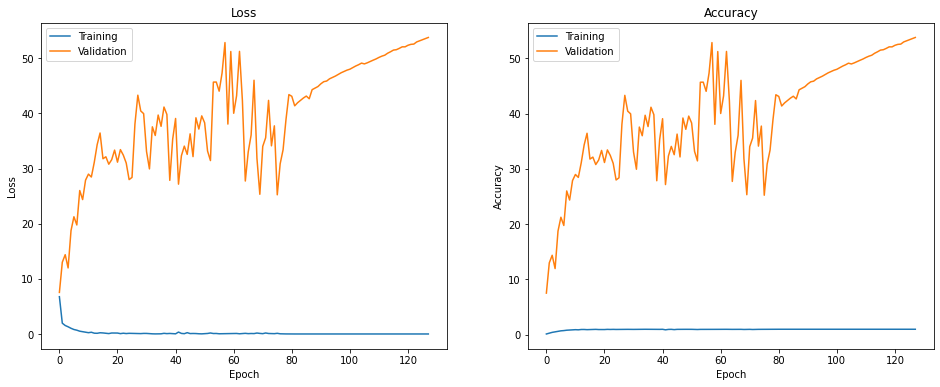

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

The model is overfitted, however the accuracy in test set is still quite high.